In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [2]:
# Importing all datasets
churn_data = pd.read_csv('churn_data.csv')
customer_data =  pd.read_csv('customer_data.csv')
internet_data =  pd.read_csv('internet_data.csv')

In [3]:
#Merging churn_data and customer_data on 'customerID' using inner join on customerID
df_1 = churn_data.merge(customer_data, on='customerID', how='inner')


In [4]:
#Final dataframe with all predictor variables (merging df_1 and internet_data on 'customerID')
telecom = df_1.merge(internet_data, on='customerID', how='inner')


In [5]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
#Lets see statistical description for our master data
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [7]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [8]:
# Converting Yes to 1 and No to 0 using map
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})

telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})


telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})


telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})


telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})


In [9]:
# Creating a dummy variable for the variable 'Contract' and keeping drop_first=True
cont = pd.get_dummies(telecom['Contract'], prefix='Contract', drop_first=True)

# Adding the results to the master dataframe i.e., telecom
telecom = pd.concat([telecom, cont], axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and keeping drop_first=True
pm = pd.get_dummies(telecom['PaymentMethod'], prefix='PaymentMethod', drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, pm], axis=1)

# Creating a dummy variable for the variable 'gender' and keeping drop_first=True
gen = pd.get_dummies(telecom['gender'], prefix='gender', drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, gen], axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and keeping drop_first=True
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines', drop_first=True)

# Dropping 'MultipleLines_No phone service' column
ml1 = ml.drop('MultipleLines_No phone service', axis=1)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, ml1], axis=1)

# Creating a dummy variable for the variable 'InternetService' and keeping drop_first=True
iser = pd.get_dummies(telecom['InternetService'], prefix='InternetService', drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, iser], axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')

# Dropping 'OnlineSecurity_No internet service' column from os
os1 = os.drop('OnlineSecurity_No internet service', axis=1)

# Adding os1 to the master dataframe
telecom = pd.concat([telecom, os1], axis=1)

# Creating a dummy variable for the variable 'OnlineBackup' and keeping drop_first=True
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')

# Dropping 'OnlineBackup_No internet service' from ob
ob1 = ob.drop('OnlineBackup_No internet service', axis=1)

# Adding the results(ob1) to the master dataframe
telecom = pd.concat([telecom, ob1], axis=1)

# Creating a dummy variable for the variable 'DeviceProtection' and keeping drop_first=True
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')

# Dropping 'DeviceProtection_No internet service' from dp
dp1 = dp.drop('DeviceProtection_No internet service', axis=1)

# Adding the results(dp1) to the master dataframe
telecom = pd.concat([telecom, dp1], axis=1)

# Creating a dummy variable for the variable 'TechSupport' and keeping drop_first=True
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')

# Dropping 'TechSupport_No internet service' from ts
ts1 = ts.drop('TechSupport_No internet service', axis=1)

# Adding the results(ts1) to the master dataframe
telecom = pd.concat([telecom, ts1], axis=1)

# Creating a dummy variable for the variable 'StreamingTV' and keeping drop_first=True
st = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')

# Dropping 'StreamingTV_No internet service' from st
st1 = st.drop('StreamingTV_No internet service', axis=1)

# Adding the results(st1) to the master dataframe
telecom = pd.concat([telecom, st1], axis=1)

# Creating a dummy variable for the variable 'StreamingMovies' and keeping drop_first=True
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')

# Dropping 'StreamingMovies_No internet service' from sm
sm1 = sm.drop('StreamingMovies_No internet service', axis=1)

# Adding the results(sm1) to the master dataframe
telecom = pd.concat([telecom, sm1], axis=1)


In [10]:
# List of columns to drop
columns_to_drop = [
    'Contract',
    'PaymentMethod',
    'gender',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Drop the original columns from the master dataset
telecom = telecom.drop(columns=columns_to_drop)

In [11]:
# Convert 'TotalCharges' to numeric type
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')


In [12]:
# again check data type informationof our master dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

In [13]:
bool_columns = [
    'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'gender_Male',
    'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
    'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
    'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes'
]

# Convert boolean columns to uint8
telecom[bool_columns] = telecom[bool_columns].astype('uint8')


In [14]:
telecom.dtypes

customerID                                object
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Contract_One year                          uint8
Contract_Two year                          uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
gender_Male                                uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No                          uint8
OnlineSecurity_Yes  

In [15]:
# Getting all continues variables in separate dataframe
num_telecom = telecom[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']]


In [16]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
percentiles = [0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
outliers_check = num_telecom.describe(percentiles=percentiles)

In [17]:
outliers_check

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [18]:
# Checking total missing values (column-wise)
missing_values = telecom.isnull().sum()
missing_values

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                

In [19]:
# Checking the percentage of missing values
percentage_missing = (telecom.isnull().sum() / len(telecom) * 100).round(2)
percentage_missing

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No                   

In [20]:
# Removing NaN form TotalCharges rows
telecom = telecom.dropna(subset=['TotalCharges'])

In [21]:
# Lets Check percentage of missing values after removing the missing values
percentage_missing_after_removal = (telecom.isnull().sum() / len(telecom) * 100).round(2)
percentage_missing_after_removal

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No                          0.0
OnlineBack

In [22]:
# print non null count in df
telecom.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Contract_

In [23]:
# Getting all desired continues variables like 'tenure','MonthlyCharges' and 'TotalCharges' into one dataframe.
df =telecom[['tenure', 'MonthlyCharges', 'TotalCharges']]


In [24]:
# Standardising above continuous features
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the continuous features to be standardized
continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply standardization to the selected features
telecom[continuous_features] = scaler.fit_transform(telecom[continuous_features])

# The standardized DataFrame is now stored in 'std_df'
std_df = telecom

# Display the standardized DataFrame
print(std_df)

      customerID    tenure  PhoneService  PaperlessBilling  MonthlyCharges  \
0     7590-VHVEG -1.280248             0                 1       -1.161694   
1     5575-GNVDE  0.064303             1                 0       -0.260878   
2     3668-QPYBK -1.239504             1                 1       -0.363923   
3     7795-CFOCW  0.512486             0                 0       -0.747850   
4     9237-HQITU -1.239504             1                 1        0.196178   
...          ...       ...           ...               ...             ...   
7038  6840-RESVB -0.343137             1                 1        0.664868   
7039  2234-XADUH  1.612573             1                 1        1.276493   
7040  4801-JZAZL -0.872808             0                 1       -1.170004   
7041  8361-LTMKD -1.158016             1                 1        0.319168   
7042  3186-AJIEK  1.368109             1                 1        1.357932   

      TotalCharges  Churn  SeniorCitizen  Partner  Dependents  

In [25]:
# Dropping 'tenure','MonthlyCharges' and 'TotalCharges' from telecom as we want to add the standardised fetaures 
telecom = telecom.drop(['tenure', 'MonthlyCharges', 'TotalCharges'],axis=1)


In [26]:
# Add std_df into telecom
telecom =pd.concat([telecom, std_df[['tenure', 'MonthlyCharges', 'TotalCharges']]], axis=1)


In [27]:
# print telecom tail
telecom.tail()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,-0.343137,0.664868,-0.129180
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,1,0,0,1,0,1,1.612573,1.276493,2.241056
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,-0.872808,-1.170004,-0.854514
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.158016,0.319168,-0.872095
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,1.368109,1.357932,2.012344


In [28]:
#caluclating total churn percentage in our master dataframe
churn =(telecom['Churn'].mean() * 100)


In [29]:
# print churn
churn

26.578498293515356

In [30]:
# Putting feature variable to X. drop 'customerID' from features as its not informative for our prediction
X = telecom.drop(['customerID', 'Churn'], axis=1)


# Putting response variable to y
y = telecom['Churn']


In [31]:
# print y head
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
# import statsmodels api as sm
import statsmodels.api as sm

In [33]:
# import train_test_split module
from sklearn.model_selection import train_test_split

In [34]:
# adding constant to X
X=sm.add_constant(X)

# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)



In [35]:
# Logistic regression model
logm1 = sm.Logit(y_train, X_train)

# Fit the model to the training data
logm1 = logm1.fit()
logm1.summary()

Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.2912
Time:                        14:17:47   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783        nan        nan        nan         nan         nan
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348        nan        nan        nan         nan         nan
OnlineSecurity_No                         0.0905   1.75e+06   5.16e-08      1.000   -3.44e+06    3.44e+06
OnlineSecurity_Yes                        0.0660   1.72e+06   3.83e-08      1.000   -3.38e+06    3.38e+06
OnlineBackup_No                          -0.0088        nan        nan        nan         nan         nan
OnlineBackup_Yes                          0.1653   1.23e+06   1.34e-07      1.000   -2.42e+06    2.42e+06
DeviceProtection_No                      -0.0832        nan        nan        nan         nan         nan
DeviceProtection_Yes                      0.2397        nan        nan        nan         nan         nan
TechSupport_No                            0.0935   2.11e+06   4.43e-08      1.000   -4.14e+06    4.14e+06
TechSupport_Yes                           0.0630   2.11e+06   2.98e-08      1.000   -4.14e+06    4.14e+06
StreamingTV_No                           -0.4016   3.26e+06  -1.23e-07      1.000    -6.4e+06     6.4e+06
StreamingTV_Yes                           0.5581   3.12e+06   1.79e-07      1.000   -6.12e+06    6.12e+06
StreamingMovies_No                       -0.3459   4.34e+06  -7.97e-08      1.000   -8.51e+06    8.51e+06
StreamingMovies_Yes                       0.5024   4.34e+06   1.16e-07      1.000   -8.51e+06    8.51e+06
tenure                                   -1.5197      0.190  

In [36]:
# List of columns to drop
columns_to_drop = ['Dependents', 'PaymentMethod_Electronic check', 'gender_Male',
                   'InternetService_No','DeviceProtection_Yes']

# Drop the specified columns from the DataFrame 'X'
X.drop(columns=columns_to_drop, axis=1,inplace=True)

# Display the updated DataFrame 'X'
X.head()


,const,PhoneService,PaperlessBilling,SeniorCitizen,Partner,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_Yes,...,DeviceProtection_No,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,1.0,0,1,0,1,0,0,0,0,0,...,1,1,0,1,0,1,0,-1.280248,-1.161694,-0.994194
1,1.0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0.064303,-0.260878,-0.173740
2,1.0,1,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,0,-1.239504,-0.363923,-0.959649
3,1.0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0.512486,-0.747850,-0.195248
4,1.0,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,-1.239504,0.196178,-0.940457


In [37]:
# Importing matplotlib and seaborn
# Import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

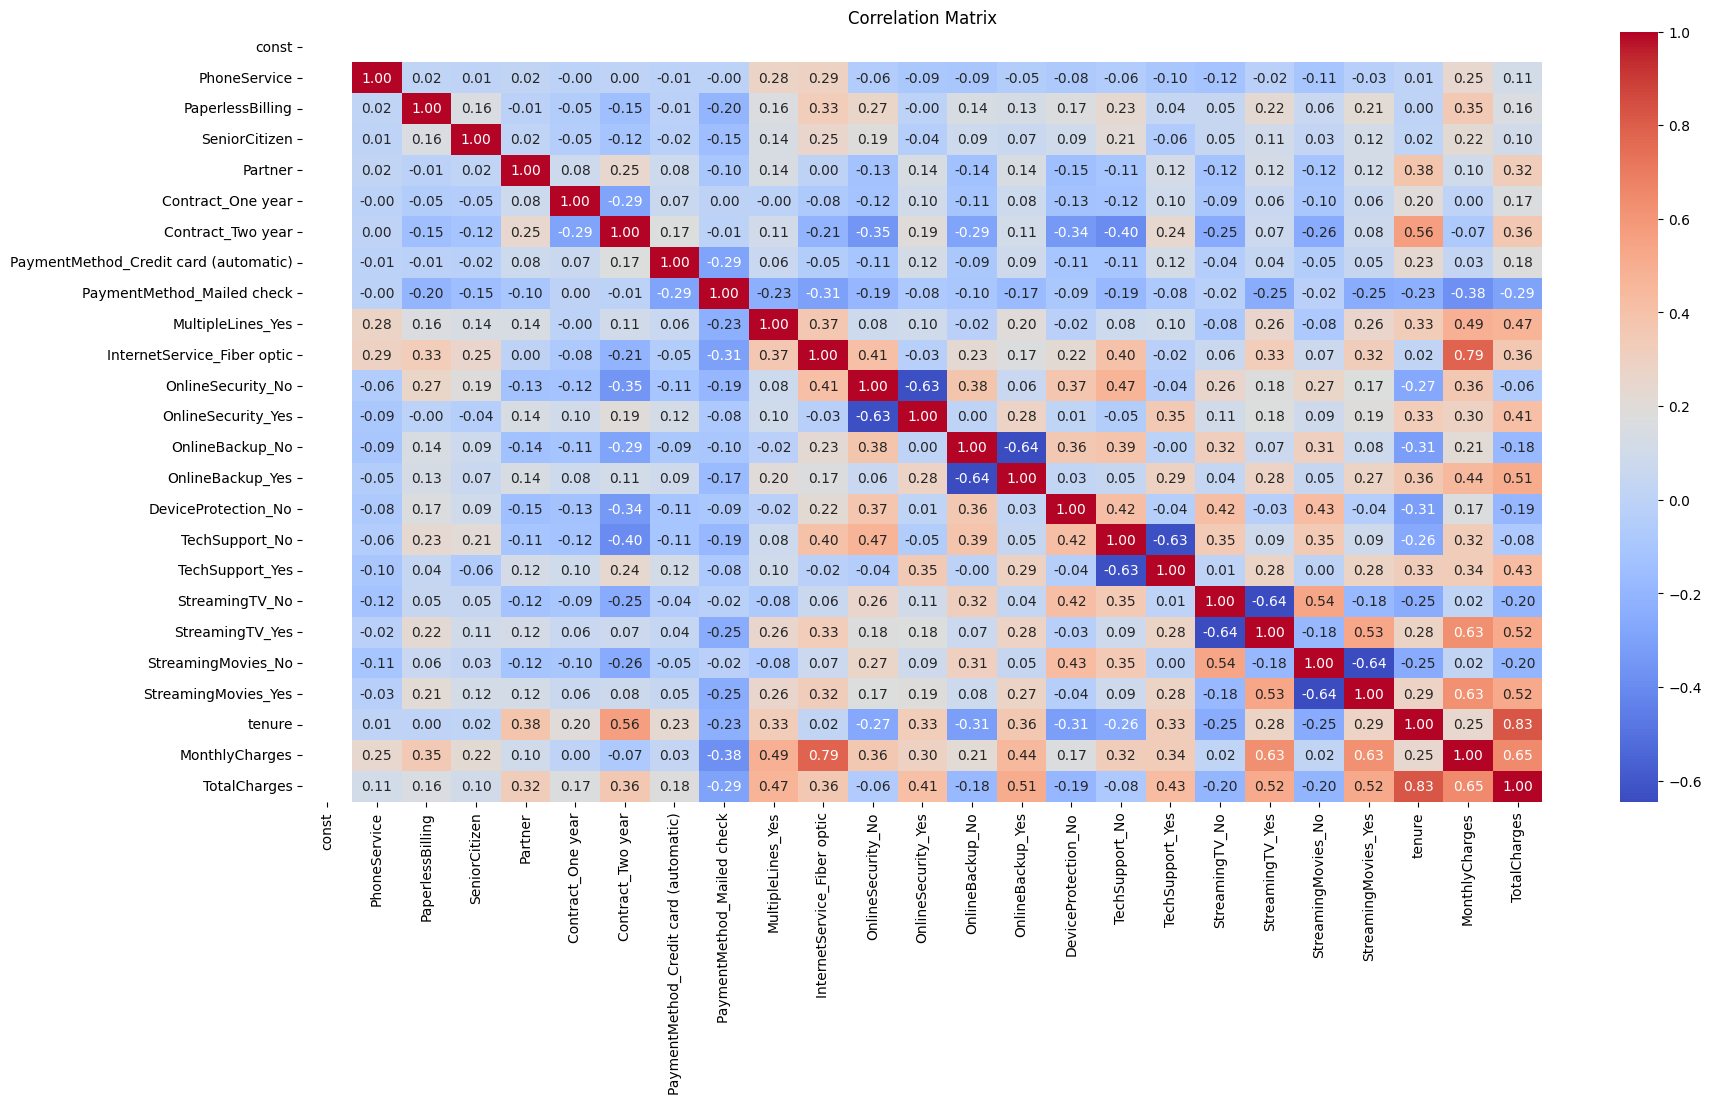

In [38]:
# Let's see the correlation matrix 

       # Size of the figure

# Set the figure size
plt.figure(figsize=(20, 10))  # You can adjust the width (10) and height (8) as needed

# Create a correlation matrix
correlation_matrix = X.corr()

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the plot
plt.title("Correlation Matrix")

# Display the plot
plt.show()


In [39]:
# Write a correlation function to drop correlleation function to remove highly correlated variables (>70%)
def correlation(dataset, threshold):
    col_corr = set()  # Set to store the names of correlated columns
    corr_matrix = dataset.corr()  # Compute the correlation matrix
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # Get the name of the column
                col_corr.add(colname)  # Add the column name to the set
    
    return col_corr 

In [40]:
# call the function with threshold
corr_features = correlation(X,0.7)

len(set(corr_features))

2

In [41]:
# print corr_features
corr_features

{'MonthlyCharges', 'TotalCharges'}

In [42]:
# Lets drop the above variables from X

X.drop(['MonthlyCharges', 'TotalCharges'],axis=1,inplace=True)

In [43]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have your feature variables in X_train

# Create an empty DataFrame to store VIF scores
vif = pd.DataFrame()

# Add the variable names from X_train to the 'Variable' column of the vif DataFrame
vif['Variable'] = X.columns

# Calculate VIF scores for each feature
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


C:\Users\nasee\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [44]:
# print vif
vif.sort_values(by='VIF')


,Variable,VIF
3,SeniorCitizen,1.112001
7,PaymentMethod_Credit card (automatic),1.169197
4,Partner,1.178250
2,PaperlessBilling,1.206577
1,PhoneService,1.353494
8,PaymentMethod_Mailed check,1.369829
9,MultipleLines_Yes,1.423045
15,DeviceProtection_No,1.615382
5,Contract_One year,1.615711
10,InternetService_Fiber optic,1.988273


In [45]:
X.columns

Index(['const', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Partner',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'tenure'],
      dtype='object')

In [46]:
# Lets drop above variables also from X
X = X.drop(['OnlineSecurity_No',
'OnlineSecurity_Yes',
'OnlineBackup_No',
'OnlineBackup_Yes',
'TechSupport_No',
'TechSupport_Yes',
'StreamingTV_No',
'StreamingTV_Yes',
'StreamingMovies_No',
'StreamingMovies_Yes'], axis=1)

<Axes: >

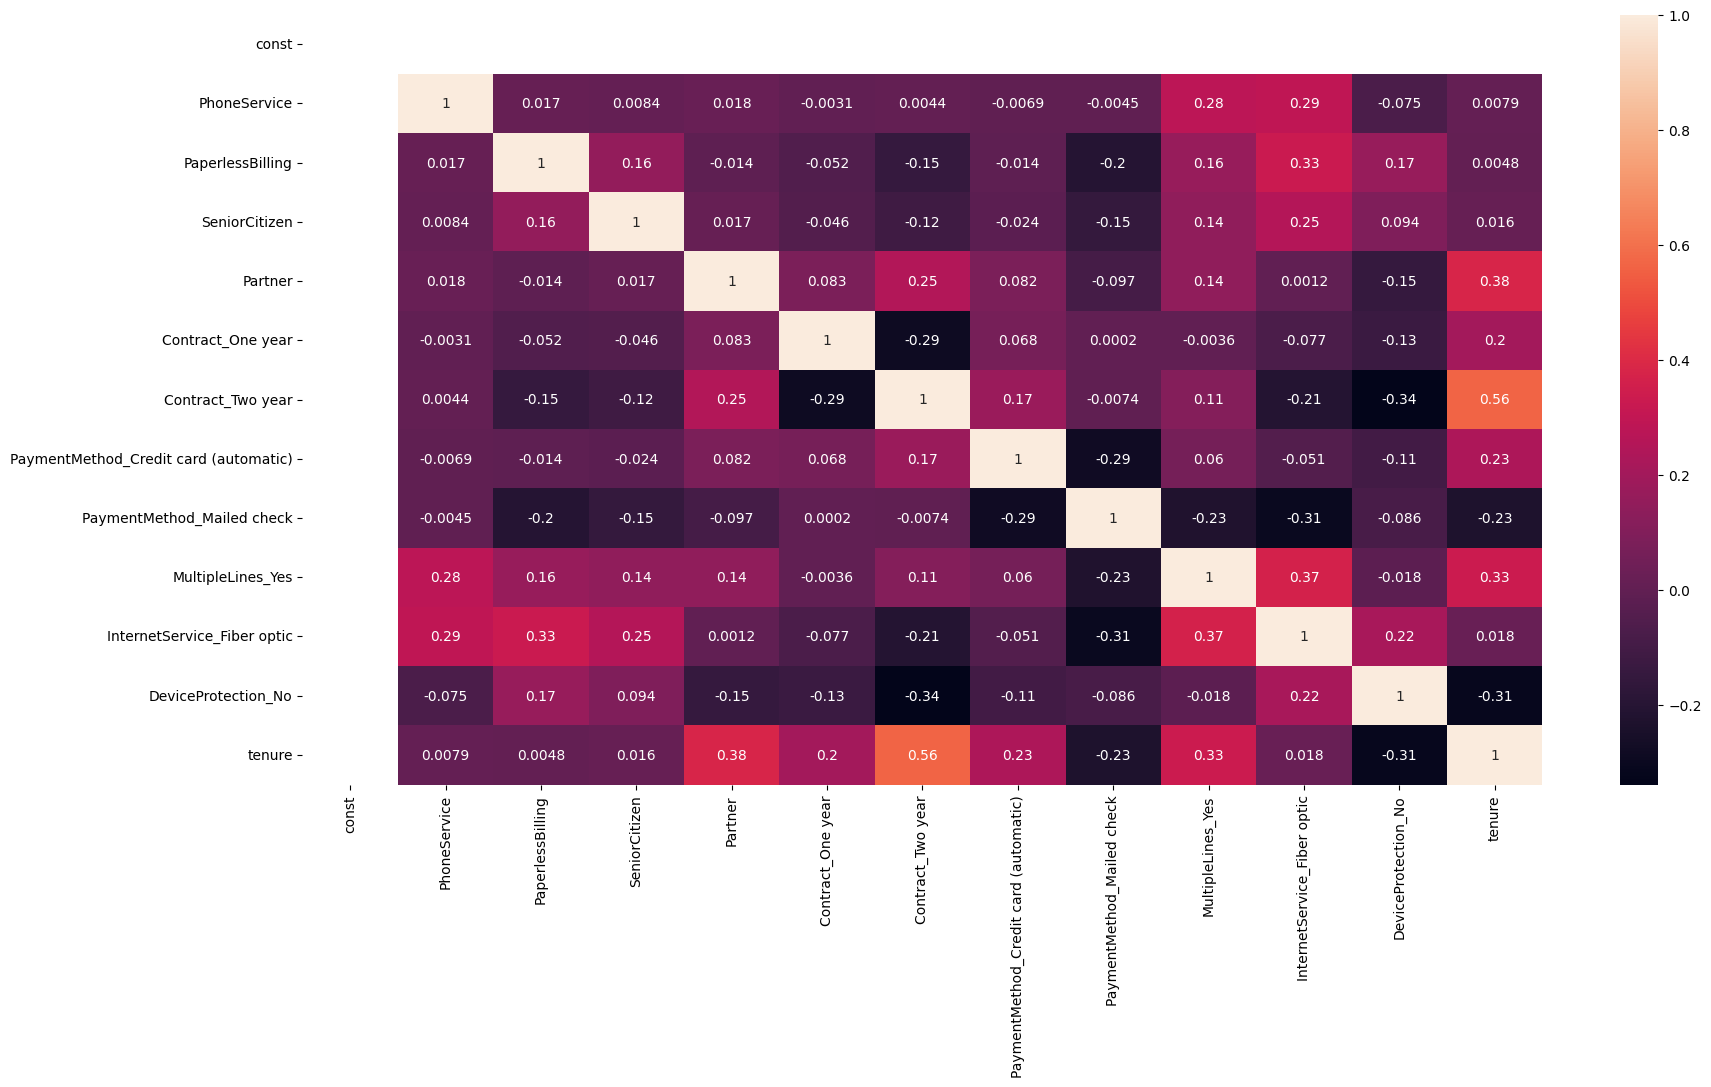

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(20, 10))
correlation_matrix = X.corr()
sns.heatmap(X.corr(),annot=True)

In [48]:
X.columns

Index(['const', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Partner',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'DeviceProtection_No', 'tenure'],
      dtype='object')

In [49]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)

# call logit method on sm and pass train data
logm2 = sm.Logit(y_train, X_train).fit()


logm2_summary = logm2.summary()

# Print the summar
logm2_summary

Optimization terminated successfully.
         Current function value: 0.417589
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4909
Method:                           MLE   Df Model:                           12
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.2733
Time:                        14:17:53   Log-Likelihood:                -2055.4
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3629      0.167     -8.153      0.000      -1.691      -1.035
PhoneService                             -0.7241      0.146     -4.961      0.000      -1.010      -0.438
PaperlessBilling                          0.4160      0.088      4.734      0.000       0.244       0.588
SeniorCitizen                             0.4802      0.099      4.828      0.000       0.285       0.675
Partner                                  -0.0074      0.085     -0.087      0.931      -0.174       0.159
Contract_One year                        -0.7131      0.124     -5.732      0.000      -0.957      -0.469
Contract_Two year                        -1.3968      0.204     -6.848      0.000      -1.797      -0.997
PaymentMethod_Credit card (automatic)    -0.4312      0.112     -3.857      0.000      -0.650      -0.212
PaymentMethod_Mailed check               -0.4723      0.107     -4.407      0.000      -0.682      -0.262
MultipleLines_Yes                         0.3232      0.094      3.450      0.001       0.140       0.507
InternetService_Fiber optic               1.2735      0.100     12.718      0.000       1.077       1.470
DeviceProtection_No                       0.1462      0.083      1.757      0.079      -0.017       0.309
tenure                                   -0.8955      0.066    -13.643      0.000      -1.024      -0.767
=========================================================================================================
"""

In [50]:
# import RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



# Initiate LogisticRegression()
logreg = LogisticRegression()


 # Initialise RFE 
rfe =RFE(logreg)
           

# fitting RFE 
rfe = rfe.fit(X, y)


# Printing the boolean results
rfe.support_
    
           

array([False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True])

In [51]:
rfe.ranking_

array([8, 1, 1, 5, 7, 1, 1, 4, 3, 2, 1, 6, 1])

In [52]:
# printing column names which were suppported by RFE
X.columns[rfe.support_]

Index(['PhoneService', 'PaperlessBilling', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic', 'tenure'],
      dtype='object')

In [53]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic', 'tenure']


In [54]:
# Let's run the model using the selected variables but this time we will use Logistic Regression
# from sklearn import metrics

#initialise Logistic Regression
logsk = LogisticRegression()


#fitting model using above columns as input
logsk.fit(X_train[col],y_train)


LogisticRegression()

In [55]:
#recreating the model with StatsModels with RFE selecte columns

logm3 = sm.Logit(y_train,X_train[col])
logm3.fit().summary()



Optimization terminated successfully.
         Current function value: 0.435370
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4916
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.2423
Time:                        14:17:53   Log-Likelihood:                -2142.9
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                3.292e-294
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
PhoneService                   -1.7219      0.092    -18.795      0.000      -1.901      -1.542
PaperlessBilling                0.1451      0.076      1.897      0.058      -0.005       0.295
Contract_One year              -1.2142      0.115    -10.578      0.000      -1.439      -0.989
Contract_Two year              -2.1339      0.192    -11.097      0.000      -2.511      -1.757
InternetService_Fiber optic     1.5819      0.093     17.094      0.000       1.401       1.763
tenure                         -0.6079      0.053    -11.546      0.000      -0.711      -0.505
===============================================================================================
"""

In [56]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])


In [57]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)


In [58]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [59]:
# Let's see the head
y_pred_1.head()

,1
0,0.559526
1,0.305237
2,0.017941
3,0.726954
4,0.018605


In [60]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [61]:
telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239504,0.196178,-0.940457


In [62]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [63]:
# Removing index for both dataframes to append them side by side 
y_test_df.reset_index(drop=True, inplace=True)
y_pred_1.reset_index(drop=True, inplace=True)


In [64]:
# Appending y_test_df and y_pred_1
y_pred_final =pd.concat([y_test_df,y_pred_1],axis=1)

In [65]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={1:'Churn_prob'})


In [66]:
#print y_pred_final
y_pred_final

,Churn,CustID,Churn_prob
0,0,942,0.559526
1,1,3730,0.305237
2,0,1761,0.017941
3,1,2283,0.726954
4,0,1872,0.018605
...,...,...,...
2105,0,1289,0.019079
2106,0,3508,0.056366
2107,0,6765,0.012661
2108,0,3598,0.249463


In [67]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID','Churn','Churn_prob'])


In [68]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_prob
0,942,0,0.559526
1,3730,1,0.305237
2,1761,0,0.017941
3,2283,1,0.726954
4,1872,0,0.018605


In [69]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)


In [70]:
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_prob,predicted
0,942,0,0.559526,1
1,3730,1,0.305237,0
2,1761,0,0.017941,0
3,2283,1,0.726954,1
4,1872,0,0.018605,0


In [71]:
# import metrics 

from sklearn import metrics

In [72]:
# Lets check what all things python provides us in confusion matrix using help function.
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [73]:
# get Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted)


In [74]:
confusion

array([[1360,  168],
       [ 283,  299]], dtype=int64)

In [75]:
# meaning of above confusion matrix is

# Predicted     not_churn    churn
# Actual
# not_churn        1363      165
# churn            273       309

In [76]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.7862559241706161

In [77]:
# Lets check true positive ,true negatives,false positives and false negatives

TP = confusion[1, 1]              # true positive 
TN = confusion[0, 0]              # true negatives
FP = confusion[0, 1]              # false positives
FN = confusion[1, 0]             # false negatives

In [78]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP + FN)

0.5137457044673539

In [79]:
# Let us calculate specificity
TN / (TN + FP)

0.8900523560209425

In [80]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP / (FP + TN)

0.1099476439790576

In [81]:
# positive predictive value 
TP / (TP + FP)

0.6402569593147751

In [82]:
# Negative predictive value
TN / (TN + FN)

0.8277541083384053

You can also use classification_report to get precision, recall, f1-score, support

In [83]:
#  import classification_report
from sklearn.metrics import classification_report

# Assuming you have your actual target values (y_test) and predicted values (y_pred) ready
print(classification_report(y_pred_final.Churn, y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1528
           1       0.64      0.51      0.57       582

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [84]:
# Here we have given you a function to plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

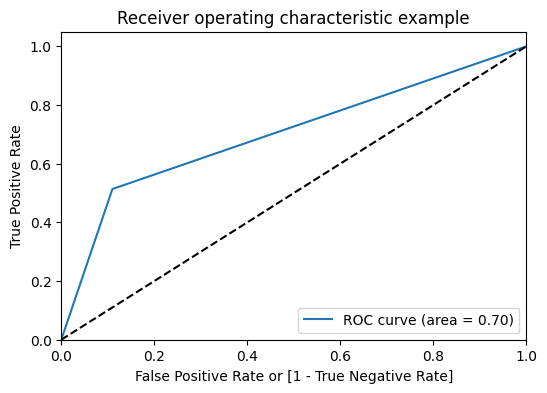

(array([0.        , 0.10994764, 1.        ]),
 array([0.       , 0.5137457, 1.       ]),
 array([inf,  1.,  0.]))

In [85]:
# Use above function to plot ROC curve
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [86]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

# loop numbers and append churn probability to y_pred_final for different prob cutoff 
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)

    
# print  y_pred_final head
y_pred_final.head()


,CustID,Churn,Churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.559526,1,1,1,1,1,1,1,0,0,0,0
1,3730,1,0.305237,0,1,1,1,1,0,0,0,0,0,0
2,1761,0,0.017941,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.726954,1,1,1,1,1,1,1,1,1,0,0
4,1872,0,0.018605,0,1,0,0,0,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [87]:
# Create an empty dataframe with columns 'prob','accuracy','sensi' and 'speci'
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 = metrics.confusion_matrix(y_test, (y_pred_final['Churn_prob'] > i).astype(int))
    
    #total in cm1
    total1= sum(sum(cm1))

    
    #Calculate accuracy
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    
    #calculate specificity
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    #calculate sensitivity
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity
    cutoff_df.loc[i] =[i, accuracy, sensi, speci]

# print cutoff_df 
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.275829,1.000000,0.000000
0.1,0.1,0.600000,0.946735,0.467932
0.2,0.2,0.684360,0.865979,0.615183
0.3,0.3,0.750237,0.723368,0.760471
0.4,0.4,0.773934,0.604811,0.838351
0.5,0.5,0.786256,0.513746,0.890052
0.6,0.6,0.785308,0.369416,0.943717
0.7,0.7,0.760190,0.180412,0.981021
0.8,0.8,0.724171,0.000000,1.000000
0.9,0.9,0.724171,0.000000,1.000000


<Axes: xlabel='prob'>

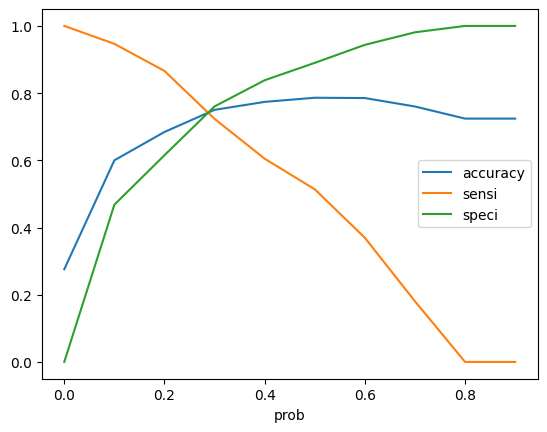

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob',y=['accuracy', 'sensi', 'speci'])

In [89]:
# Now lets get another column with final_predicted which has 0.3 cutoff probability
y_pred_final['final_predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.3 else 0)


In [90]:
y_pred_final.head()

,CustID,Churn,Churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.559526,1,1,1,1,1,1,1,0,0,0,0,1
1,3730,1,0.305237,0,1,1,1,1,0,0,0,0,0,0,1
2,1761,0,0.017941,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.726954,1,1,1,1,1,1,1,1,1,0,0,1
4,1872,0,0.018605,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
#Let's check the overall accuracy now again
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.7862559241706161

In [92]:
metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted)


array([[1360,  168],
       [ 283,  299]], dtype=int64)

In [94]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=100)



In [95]:
#initialise Logistic Regression
logs2 = LogisticRegression()



#fitting model using above columns as input
logs2.fit(X_train,y_train)


#prediction on test data
y_pred=logs2.predict(X_test)



In [96]:
# print classification_report
report = classification_report(y_test, y_pred)


In [97]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1528
           1       0.66      0.52      0.58       582

    accuracy                           0.79      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



In [100]:
#print confusion metrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion )

[[1374  154]
 [ 280  302]]


_______________________________